In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:/Epsilon/Instructor/Projects/Logestic regression/Project 16 - Advertising Problem/advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.Country.nunique()

237

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
df[(df['Area Income'] == df['Area Income'].max()) & (df['Male'] == 1)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
568,64.51,42,79484.8,190.71,Virtual 5thgeneration neural-net,Edwardmouth,1,Madagascar,2016-04-29 07:49:01,0


In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [9]:
def get_season(timestamp):
    if timestamp.month in [12, 1, 2]:
        return 'Winter'
    elif timestamp.month in [3, 4, 5]:
        return 'Spring'
    elif timestamp.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autamn'
    
def get_period(timestamp):
    if timestamp.hour in range(13):
        return 'Morning'
    else:
        return 'Evening'

In [10]:
df['Season'] = df['Timestamp'].apply(get_season)
df['Period'] = df['Timestamp'].apply(get_period)

In [11]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Season,Period
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,Spring,Morning
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,Spring,Morning
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,Spring,Evening
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,Winter,Morning
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,Summer,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,Winter,Evening
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,Spring,Morning
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,Winter,Evening
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,Spring,Morning


In [13]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Season', 'Period'],
      dtype='object')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

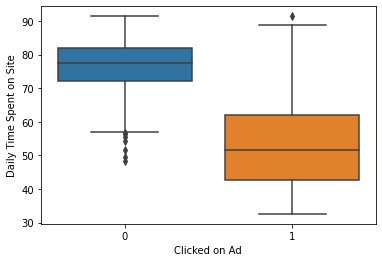

In [14]:
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

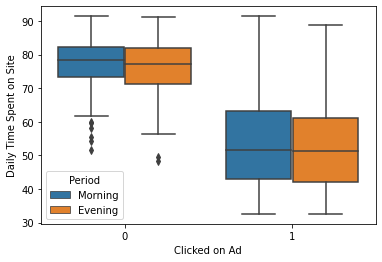

In [15]:
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, hue='Period')

In [17]:
df.City.nunique()

969

In [18]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

In [19]:
df['Ad Topic Line'].value_counts()

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

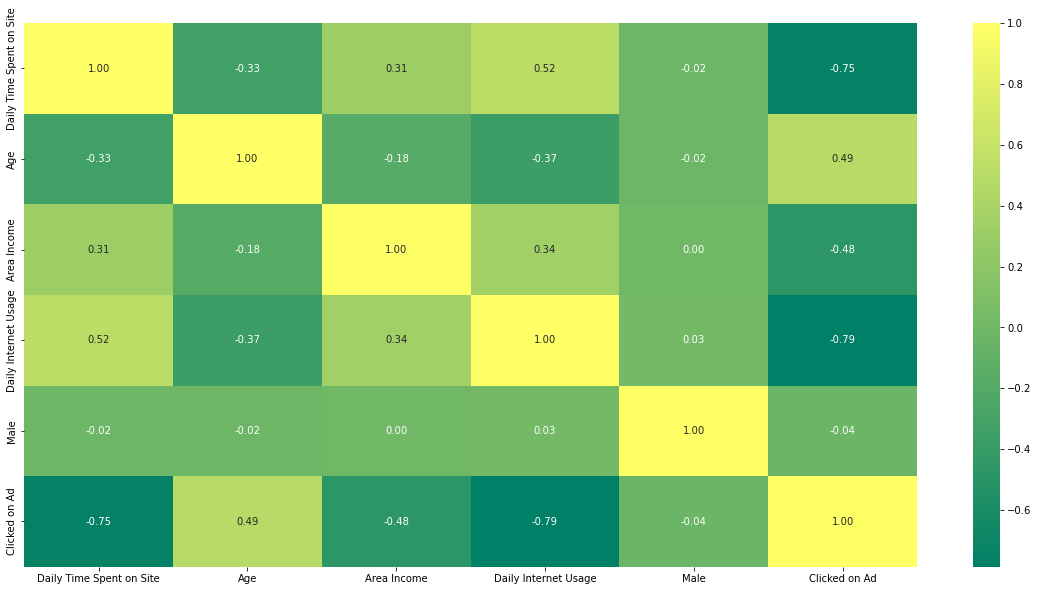

In [20]:
# heatmap correlation
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

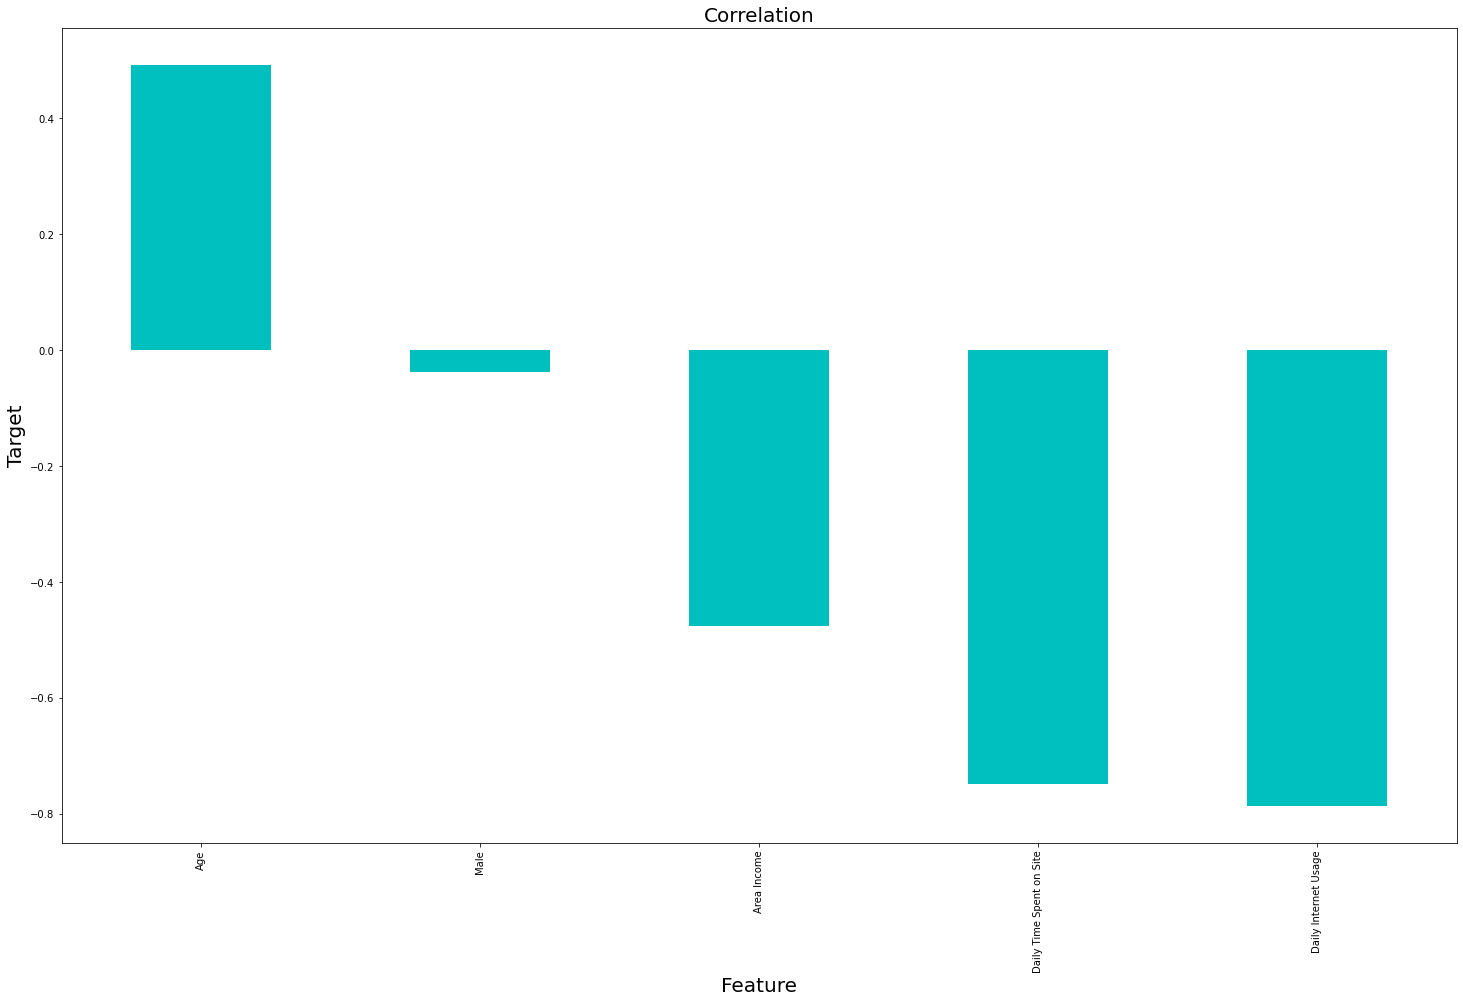

In [21]:
#Visualization of the Correlation Metrics
plt.figure(figsize = (25, 15))

df.corr()['Clicked on Ad'].sort_values(ascending = False).drop(['Clicked on Ad']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('Target', fontsize = 20)

plt.title('Correlation', fontsize = 20)

plt.show()

In [22]:
df = pd.get_dummies(df, columns=['Country', 'Season', 'Period'], drop_first=True)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Timestamp,Clicked on Ad,Country_Albania,...,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Season_Summer,Season_Winter,Period_Morning
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,2016-03-27 00:53:11,0,0,...,0,0,0,0,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,2016-04-04 01:39:02,0,0,...,0,0,0,0,0,0,0,0,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,2016-03-13 20:35:42,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,2016-01-10 02:31:19,0,0,...,0,0,0,0,0,0,0,0,1,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,2016-06-03 03:36:18,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,2016-02-11 21:49:00,1,0,...,0,0,0,0,0,0,0,0,1,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,2016-04-22 02:07:01,1,0,...,0,0,0,0,0,0,0,0,0,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,2016-02-01 17:24:57,1,0,...,0,0,0,0,0,0,0,0,1,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,2016-03-24 02:35:54,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
x = df.drop(['City','Ad Topic Line', 'Timestamp', 'Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

In [24]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,...,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Season_Summer,Season_Winter,Period_Morning
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
996,51.30,45,67782.17,134.42,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,51.63,51,42415.72,120.37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
998,55.55,19,41920.79,187.95,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [37]:
y.value_counts(normalize=True)

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

#### Splitting the data

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=14)

In [27]:
x_train.shape

(800, 244)

In [28]:
x_test.shape

(200, 244)

In [29]:
y_train.shape

(800,)

------------------------------------------------------------------------------------------------------------------------------

In [30]:
# Standarization
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
x_train

array([[ 0.87717179, -1.13515543,  0.60137674, ..., -0.55809982,
         1.50509339,  0.93463164],
       [-1.68304469, -0.33221613, -0.57686439, ...,  1.79179416,
        -0.6644106 , -1.06994024],
       [-0.47659347, -0.79103859, -1.02906354, ..., -0.55809982,
        -0.6644106 , -1.06994024],
       ...,
       [-1.56747937, -1.13515543, -0.58101701, ..., -0.55809982,
         1.50509339, -1.06994024],
       [-0.23911308, -1.13515543,  0.00871078, ..., -0.55809982,
        -0.6644106 , -1.06994024],
       [ 0.61492739, -1.36456666,  0.17072905, ..., -0.55809982,
        -0.6644106 , -1.06994024]])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [33]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, knn.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')

Training Accuracy: 0.865
Testing Accuracy: 0.73
Testing Confusion Matrix: 
[[77 27]
 [27 69]]
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       104
           1       0.72      0.72      0.72        96

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [34]:
lr=LogisticRegression(penalty='none')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, lr.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')

Training Accuracy: 0.9925
Testing Accuracy: 0.955
Testing Confusion Matrix: 
[[100   4]
 [  5  91]]
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       104
           1       0.96      0.95      0.95        96

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [44]:
svc=SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(f'Training Accuracy: {accuracy_score(y_train, svc.predict(x_train))}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Classification report: \n{classification_report(y_test, y_pred)}')

Training Accuracy: 0.99125
Testing Accuracy: 0.98
Testing Confusion Matrix: 
[[100   4]
 [  0  96]]
Testing Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       104
           1       0.96      1.00      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [35]:
y_test

172    0
278    0
486    0
513    1
672    0
      ..
809    1
821    0
202    1
1      0
166    1
Name: Clicked on Ad, Length: 200, dtype: int64

In [36]:
pd.DataFrame([y_pred[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Predicted,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
Original,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,1
